# Preparing the data for modeling

## Subsetting the dataset
 
When our flat-file is ready for modeling we have to procede to generate the partitions that we will use for modeling. No matter which method we will use for training our data, we have to generate first a test dataset. This test dataset has to be set on hold aside and only used at the end of the whole process of training and selecting the best model.
 
After we selected the test dataset we proceed to use the rest of the data for training the models. There are three main strategies for that:
 
* Dividing into train and dev
* 

* Using Bootstrapping


## Test dataset

In [1]:
data <- iris

In [2]:
head(data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
summary(data)

    User_ID            Product_ID     Gender        Age        
 Min.   :1000001   P00265242:  1858   F:132197   0-17 : 14707  
 1st Qu.:1001495   P00110742:  1591   M:405380   18-25: 97634  
 Median :1003031   P00025442:  1586              26-35:214690  
 Mean   :1002992   P00112142:  1539              36-45:107499  
 3rd Qu.:1004417   P00057642:  1430              46-50: 44526  
 Max.   :1006040   P00184942:  1424              51-55: 37618  
                   (Other)  :528149              55+  : 20903  
   Occupation     City_Category Stay_In_Current_City_Years Marital_Status
 4      : 70862   A:144638      0 : 72725                  0:317817      
 0      : 68120   B:226493      1 :189192                  1:219760      
 7      : 57806   C:166446      2 : 99459                                
 1      : 45971                 3 : 93312                                
 17     : 39090                 4+: 82889                                
 20     : 32910                             

In [4]:
#library(devtools)
#install_github("karpatit/mechkar")
require(mechkar)

Loading required package: mechkar



In [6]:
Table1(data = data,y = "Species")

  |========================================================              |  80%

V1,V2,Pop,setosa,versicolor,virginica,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
Individuals,n,150,50,50,50,NA
Sepal.Length,Mean (SD),5.8 (0.8),5.0 (0.4),5.9 (0.5),6.6 (0.6),NA
Sepal.Length,Median (IQR),5.8 (5.1-6.4),5.0 (4.8-5.2),5.9 (5.6-6.3),6.5 (6.2-6.9),0
Sepal.Width,Mean (SD),3.1 (0.4),3.4 (0.4),2.8 (0.3),3.0 (0.3),NA
Sepal.Width,Median (IQR),3.0 (2.8-3.3),3.4 (3.2-3.7),2.8 (2.5-3.0),3.0 (2.8-3.2),0
Petal.Length,Mean (SD),3.8 (1.8),1.5 (0.2),4.3 (0.5),5.6 (0.6),NA
Petal.Length,Median (IQR),4.3 (1.6-5.1),1.5 (1.4-1.6),4.3 (4.0-4.6),5.5 (5.1-5.9),0
Petal.Width,Mean (SD),1.2 (0.8),0.2 (0.1),1.3 (0.2),2.0 (0.3),NA
Petal.Width,Median (IQR),1.3 (0.3-1.8),0.2 (0.2-0.3),1.3 (1.2-1.5),2.0 (1.8-2.3),0


In [8]:
############### TRAIN_TEST #######################
train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=False)
{
  checkTrainTest <- function(train=NULL,test=NULL) {
     train[["traintest_ind_"]] <- 1
     test[["traintest_ind_"]] <- 2
     data <- rbind(train, test)
     tab <- Table1(data=data, y="traintest_ind_",x=names(train),messages = F)
     vars <- subset(tab, pval < 0.05)$V1
     if (length(vars)==1) {
        message("You got a perfectly balanced training and test datasets")
        message(" ")
     } else {
        message("WARNING: The following variables are not balanced between the training and test datasets:")
       for (v in vars) { message(paste("*",v)) }
          message("You can try to change the seed value until you get a balanced partition.")
          message("Alternatively, you can ommit this warning and exclude those variables from your model")
          message(" ")
       }
       return(tab)
  }
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=globalenv())
  assign(test_name, data[-train_ind, ], envir=globalenv())
  tab = checkTrainTest(get(train_name),get(test_name))
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
     return(tab)
  } 
}

## Test dataset

In [20]:
tab1 <- train_test(data = data, train_name = "temp", test_name = "test",prop = 0.7, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: temp

 + Test dataset: test



  |==========================================================            |  83%

You got a perfectly balanced training and test datasets

 



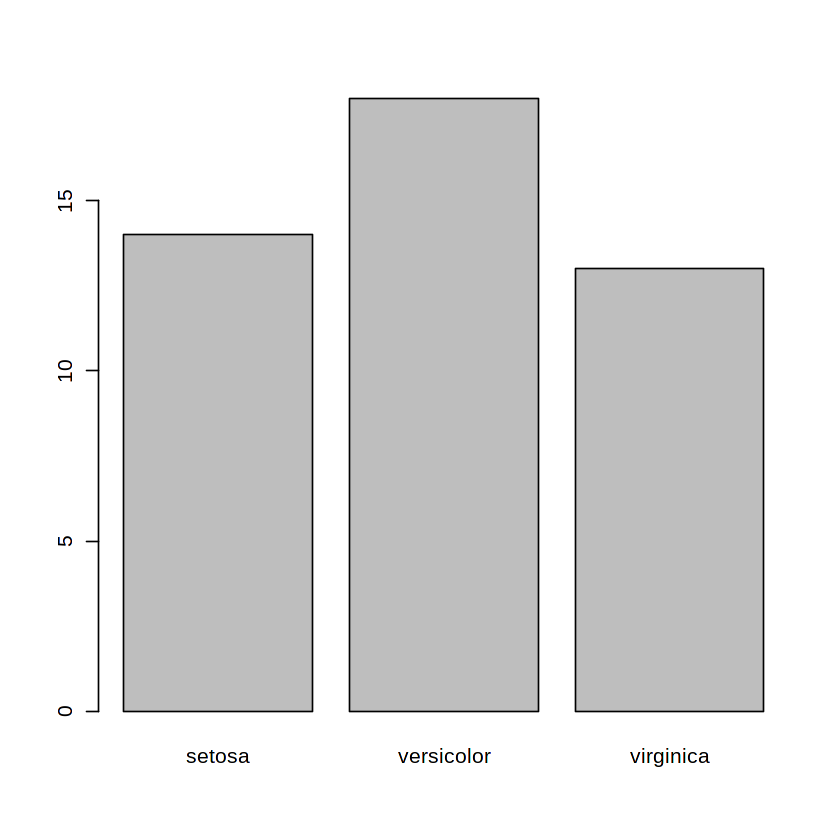

In [23]:
barplot(table(test$Species))


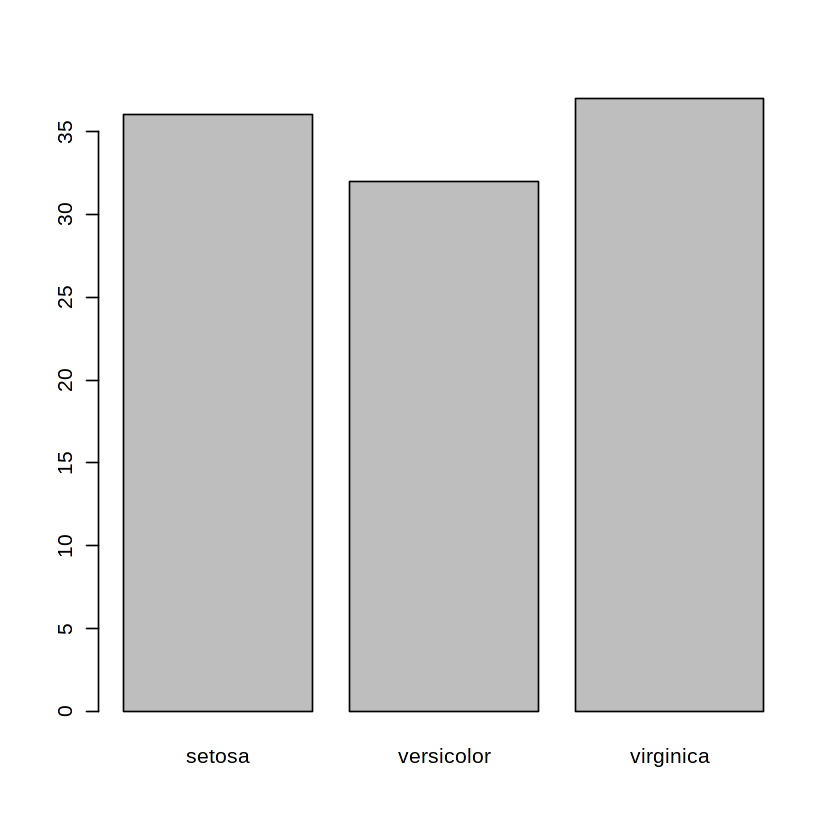

In [24]:
barplot(table(temp$Species))

[1] 105   5

[1] 45  5

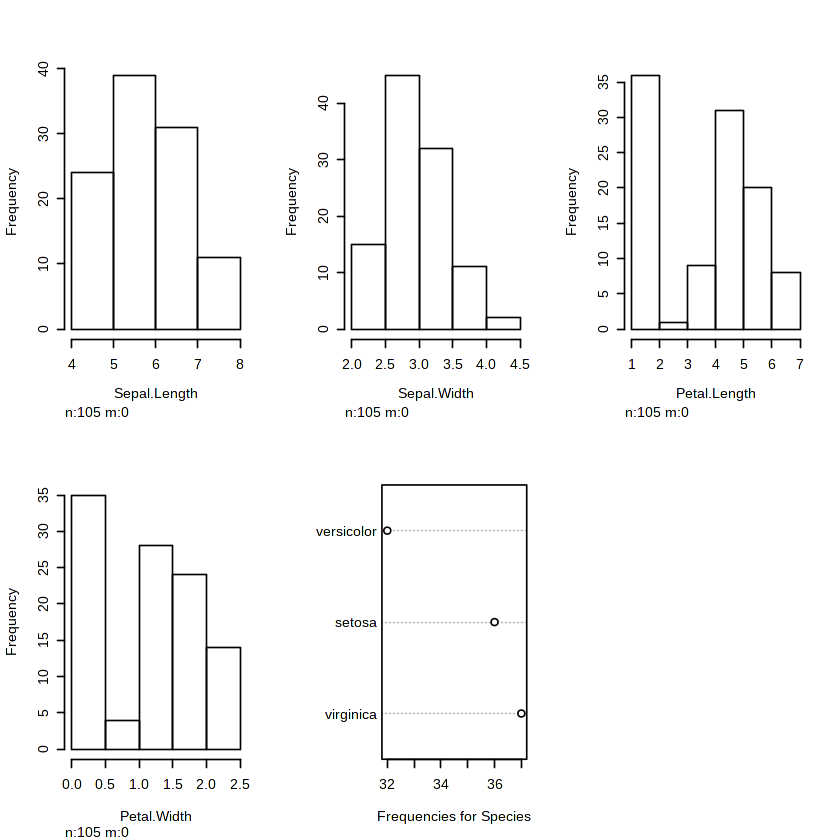

In [18]:
dim(temp)
dim(test)

hist(temp)

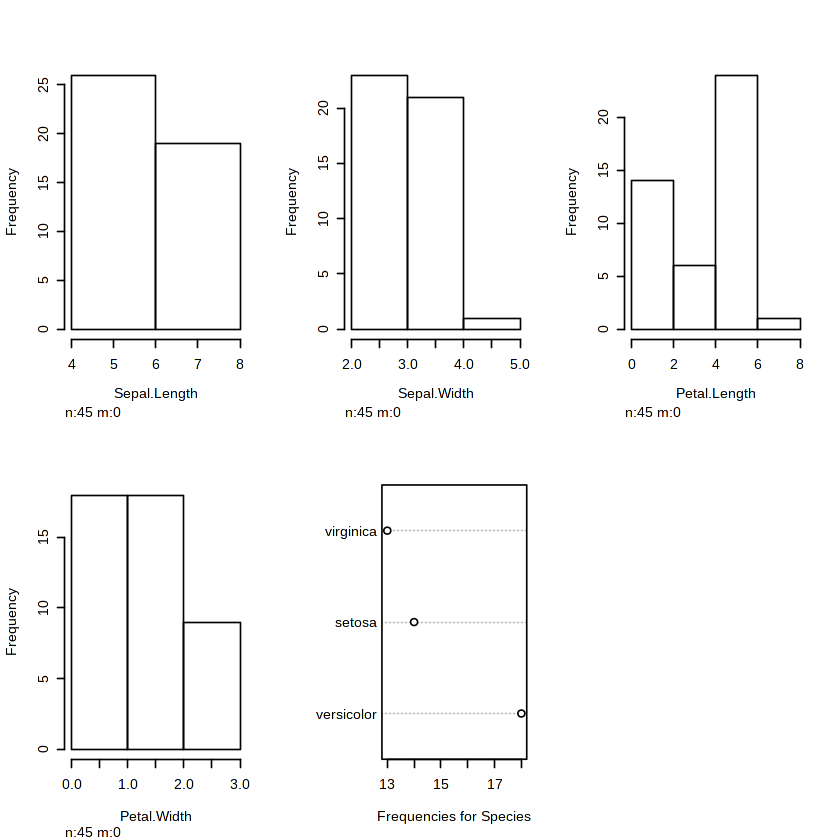

In [16]:
hist(test)

In [25]:
tab1

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,150,105,45,NA
Sepal.Length,Mean (SD),5.8 (0.8),5.8 (0.9),5.8 (0.7),NA
Sepal.Length,Median (IQR),5.8 (5.1-6.4),5.8 (5.1-6.4),5.8 (5.2-6.5),0.991
Sepal.Width,Mean (SD),3.1 (0.4),3.1 (0.4),3.1 (0.4),NA
Sepal.Width,Median (IQR),3.0 (2.8-3.3),3.0 (2.8-3.4),3.0 (2.8-3.3),0.832
Petal.Length,Mean (SD),3.8 (1.8),3.8 (1.8),3.7 (1.7),NA
Petal.Length,Median (IQR),4.3 (1.6-5.1),4.4 (1.6-5.1),4.2 (1.5-5.3),0.959
Petal.Width,Mean (SD),1.2 (0.8),1.2 (0.8),1.2 (0.8),NA
Petal.Width,Median (IQR),1.3 (0.3-1.8),1.4 (0.3-1.8),1.3 (0.3-1.8),0.95


## Train and Dev

In [45]:
tab2 <- train_test(data = temp, train_name = "train", test_name = "dev",prop = 0.8, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: dev



  |==========================================================            |  83%

You got a perfectly balanced training and test datasets

 



In [27]:
dim(train)
dim(dev)

[1] 84  5

[1] 21  5

In [28]:
tab2

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,105,84,21,NA
Sepal.Length,Mean (SD),5.8 (0.9),5.9 (0.9),5.6 (0.8),NA
Sepal.Length,Median (IQR),5.8 (5.1-6.4),5.8 (5.2-6.4),5.8 (4.9-6.1),0.219
Sepal.Width,Mean (SD),3.1 (0.4),3.1 (0.5),3.0 (0.4),NA
Sepal.Width,Median (IQR),3.0 (2.8-3.4),3.0 (2.8-3.4),3.0 (2.8-3.2),0.583
Petal.Length,Mean (SD),3.8 (1.8),3.8 (1.8),3.7 (1.8),NA
Petal.Length,Median (IQR),4.4 (1.6-5.1),4.4 (1.6-5.1),4.5 (1.6-4.9),0.765
Petal.Width,Mean (SD),1.2 (0.8),1.2 (0.7),1.1 (0.8),NA
Petal.Width,Median (IQR),1.4 (0.3-1.8),1.4 (0.4-1.8),1.4 (0.2-1.8),0.693


In [14]:
### save memeory, remove the datasets that will not be used more...
rm(temp,data)

Checking the distribution of the outcome on the three subsets

Loading required package: ggplot2


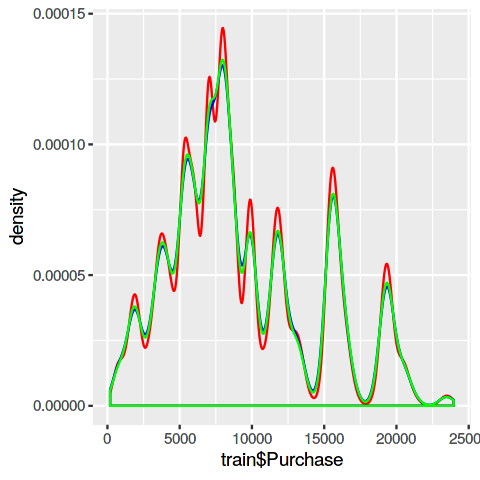

In [15]:
require(ggplot2)

options(repr.plot.width = 4, repr.plot.height = 4)

ggplot() +
    geom_density(aes(x=train$Purchase),color="red",alpha=0.3) +
    geom_density(aes(x=dev$Purchase),color="blue",alpha=0.3) +
    geom_density(aes(x=test$Purchase),color="green",alpha=0.3)


# Train-Dev

In [29]:
library(ranger)

mod1 <- ranger(Species ~., data=train)


In [30]:
mod1

Ranger result

Call:
 ranger(Species ~ ., data = train) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      84 
Number of independent variables:  4 
Mtry:                             2 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             4.76 % 

In [46]:
pred1 <- predict(mod1, data=dev)


In [47]:
table(obs=dev$Species, pred=pred1$predictions)

            pred
obs          setosa versicolor virginica
  setosa          8          0         0
  versicolor      0          4         0
  virginica       0          2         7

# Cross-Validation

<img src="https://genome.tugraz.at/proclassify/help/pages/images/xv_folds.gif"/>


In [55]:
library(caret)

# load the iris dataset
data(iris)

out<-confusionMatrix(pred1$predictions, dev$Species)


out

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa          8          0         0
  versicolor      0          4         2
  virginica       0          0         7

Overall Statistics
                                          
               Accuracy : 0.9048          
                 95% CI : (0.6962, 0.9883)
    No Information Rate : 0.4286          
    P-Value [Acc > NIR] : 7.535e-06       
                                          
                  Kappa : 0.8552          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                  1.000            1.0000           0.7778
Specificity                  1.000            0.8824           1.0000
Pos Pred Value               1.000            0.6667           1.0000
Neg Pred Value               1.000            1.0000           0.8571
P

In [66]:
# define training control
# the regular cross va;idation = 'cv'
train_c <- trainControl(method = "repeatedcv", repeats = 5)
# train the model
model <- train(Species~., data=train, trControl=train_c, method="ranger")

In [69]:
sample.int(1000,2)

[1] 406  69

In [67]:
# summarize results
print(model)

Random Forest 

84 samples
 4 predictor
 3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 75, 76, 76, 76, 75, 75, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  2     gini        0.9501190  0.9250579
  2     extratrees  0.9481746  0.9222894
  3     gini        0.9501190  0.9250579
  3     extratrees  0.9501190  0.9250579
  4     gini        0.9501190  0.9250579
  4     extratrees  0.9501190  0.9250579

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = gini
 and min.node.size = 1.


# Leave-one-out Cross Validation

In [74]:
# define training control
train_control <- trainControl(method="LOOCV")
# train the model
model <- train(Species~., data=iris, trControl=train_control, method="ranger")

In [72]:
# summarize results
print(model)

Random Forest 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 149, 149, 149, 149, 149, 149, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa
  2     gini        0.9600000  0.94 
  2     extratrees  0.9533333  0.93 
  3     gini        0.9533333  0.93 
  3     extratrees  0.9533333  0.93 
  4     gini        0.9533333  0.93 
  4     extratrees  0.9600000  0.94 

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = gini
 and min.node.size = 1.


In [41]:
?caret::trainControl

In [ ]:
?carer::train

# Boostrapping



In [75]:
# define training control
train_control <- trainControl(method="boot", number=100)
# train the model
model <- train(Species~., data=iris, trControl=train_control,method="ctree")

1 package is needed for this model and is not installed. (party). Would you like to try to install it now?

ERROR: Error: Required package is missing


In [38]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictors
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (100 reps) 
Summary of sample sizes: 150, 150, 150, 150, 150, 150, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa    
  0.01          0.9432746  0.9140960
  0.50          0.9432746  0.9140960
  0.99          0.9434500  0.9143576

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


# Dataset Inbalance

In [76]:
if(!require(imbalance)){install.packages("imbalance");require(imbalance)}
### ROSE = Random Over-Sampling Examples
if(!require(ROSE)){install.packages("ROSE");require(ROSE)}


Loading required package: imbalance

Installing package into ‘/home/dsuser08/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bnlearn’, ‘KernelKnn’, ‘smotefamily’


Loading required package: imbalance

Loading required package: ROSE

Loaded ROSE 0.0-3




In [18]:
data(newthyroid1)
head(newthyroid1)

T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,Class
105,7.3,1.5,1.5,-0.1,negative
67,23.3,7.4,1.8,-0.6,positive
111,8.4,1.5,0.8,1.2,negative
89,14.3,4.1,0.5,0.2,positive
105,9.5,1.8,1.6,3.6,negative
110,20.3,3.7,0.6,0.2,positive


In [19]:
table(newthyroid1$Class)
table(newthyroid1$Class)/nrow(newthyroid1)*100


negative positive 
     180       35 


negative positive 
83.72093 16.27907 

In [20]:
numPositive <- length(which(newthyroid1$Class == "positive"))
numNegative <- length(which(newthyroid1$Class == "negative"))
nInstances <- numNegative - numPositive
cbind(numPositive=numPositive,numNegative=numNegative,nInstances=nInstances)

numPositive,numNegative,nInstances
35,180,145


## Under Sampling
 
This techniques uses all the rows containing the minority class and select randomly the same number of minority class for the rows with the mayority class 

In [21]:
data_balanced_under <- ovun.sample(Class ~ ., data = newthyroid1, method = "under",N = numPositive*2)$data
table(data_balanced_under$Class)


negative positive 
      35       35 

## Over Sampling
 
Over sampling takes the number of rows of the mayority class and repeat the rows of the minority class up to the same number of the mayority class. The repeated rows are selected randomly.

In [57]:
#over sampling
data_balanced_over <- ovun.sample(Class ~ ., data = newthyroid1, method = "over",N = numNegative*2)$data
table(data_balanced_over$Class)


negative positive 
     180      180 

## Over-Under Sampling
 
In this technique we randomly select half of the majority class rows (under sampling) and increment the minority class rows by selecting them randomly.   

In [22]:
#over_under sampling
data_balanced_both <- ovun.sample(Class ~ ., data = newthyroid1, method = "both", p=0.5,N = 180, seed = 1)$data
table(data_balanced_both$Class)


negative positive 
      90       90 

## ROSE (Random Over-Sampling Examples) 
 
Creates a sample of synthetic data by enlarging the features space of minority and majority class examples. ROSE selects an observation belonging to the class k and generates new examples in its neighbourhood

In [23]:
# Rose: 
data.rose <- ROSE(Class ~ ., data = newthyroid1, seed = 1)$data
table(data.rose$Class)


negative positive 
     105      110 

## Oversampling with Synthetic data
 
Additionally to ROSE. The package 'inbalance' has the function pdfos. This function generates synthetic minority examples for a numerical dataset approximating a Gaussian multivariate distribution.


In [24]:
newSamples <- pdfos(dataset = newthyroid1, numInstances = nInstances,classAttr = "Class")
newDataset <- rbind(newthyroid1, newSamples)
table(newDataset$Class)


negative positive 
     180      180 

In [79]:
newthyroid1

T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,Class
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
105,7.3,1.5,1.5,-0.1,negative
67,23.3,7.4,1.8,-0.6,positive
111,8.4,1.5,0.8,1.2,negative
89,14.3,4.1,0.5,0.2,positive
105,9.5,1.8,1.6,3.6,negative
110,20.3,3.7,0.6,0.2,positive
84,21.5,2.7,1.1,-0.6,positive
113,11.1,1.7,0.8,2.3,negative
97,7.8,1.3,1.2,0.9,negative


In [87]:
mod1<-glm(Class ~., data=newthyroid1, na.action = na.omit, family="binomial")





In [88]:
?glm
